## Group: Ayo, Diala, Laura, Doug, Mark and Scott

## PREDICTING THE NFL DRAFT: http://nflcombineresults.com/

### 2000 - 2019 NFL Draft Scouting Combine Dataset with the following:  Height, Weight, Arm Length, Hand Size, 40 Yard Dash, Bench Press, Vertical Leap, Broad Jump, Shuttle, 3 Cone.

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

This is the 'Combine Dataset' that has the information of the football players with their athletic indicators used for drafting.

In [94]:
#Reading in the data
combine = pd.read_csv('Combined_D.csv')
combine.head()

,Rk,Year,Player,Pos,AV,School,College,Height_In,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Pick,Round,Team,Drafted,Dataset_n_Seq
0,NaN,1989,A.J. Greene,CB,NaN,Wake Forest,NaN,68,164,4.58,32.5,13.0,115.0,NaN,4.10,NaN,NaN,NaN,0,Sc0445
1,NaN,1989,A.J. Jenkins,OLB,NaN,Cal-State Fullerton,NaN,74,227,4.77,34.5,15.0,121.0,NaN,4.48,228.0,NaN,Pittsburgh Steelers,1,Sc0465
2,NaN,1989,Adam Bob,OLB,NaN,Texas A&M,NaN,74,238,5.01,28.5,16.0,102.0,NaN,4.43,265.0,NaN,New York Jets,1,Sc0410
3,NaN,1989,Alex Stewart,DE,NaN,Cal-State Fullerton,NaN,75,263,4.74,37.5,27.0,123.0,NaN,4.63,219.0,NaN,Minnesota Vikings,1,Sc0532
4,NaN,1989,Andrew Stewart,DE,NaN,Cincinnati,NaN,76,256,4.82,40.0,30.0,120.0,NaN,4.51,107.0,NaN,Cleveland Browns,1,Sc0533


The combine data is now used to plot an interactive bar graph: position by year. We count or aggregate the number of each position by year shown in Tableau.  Example the CB - Corner Back is in light blue color showing the number of players in the combine data for each year.

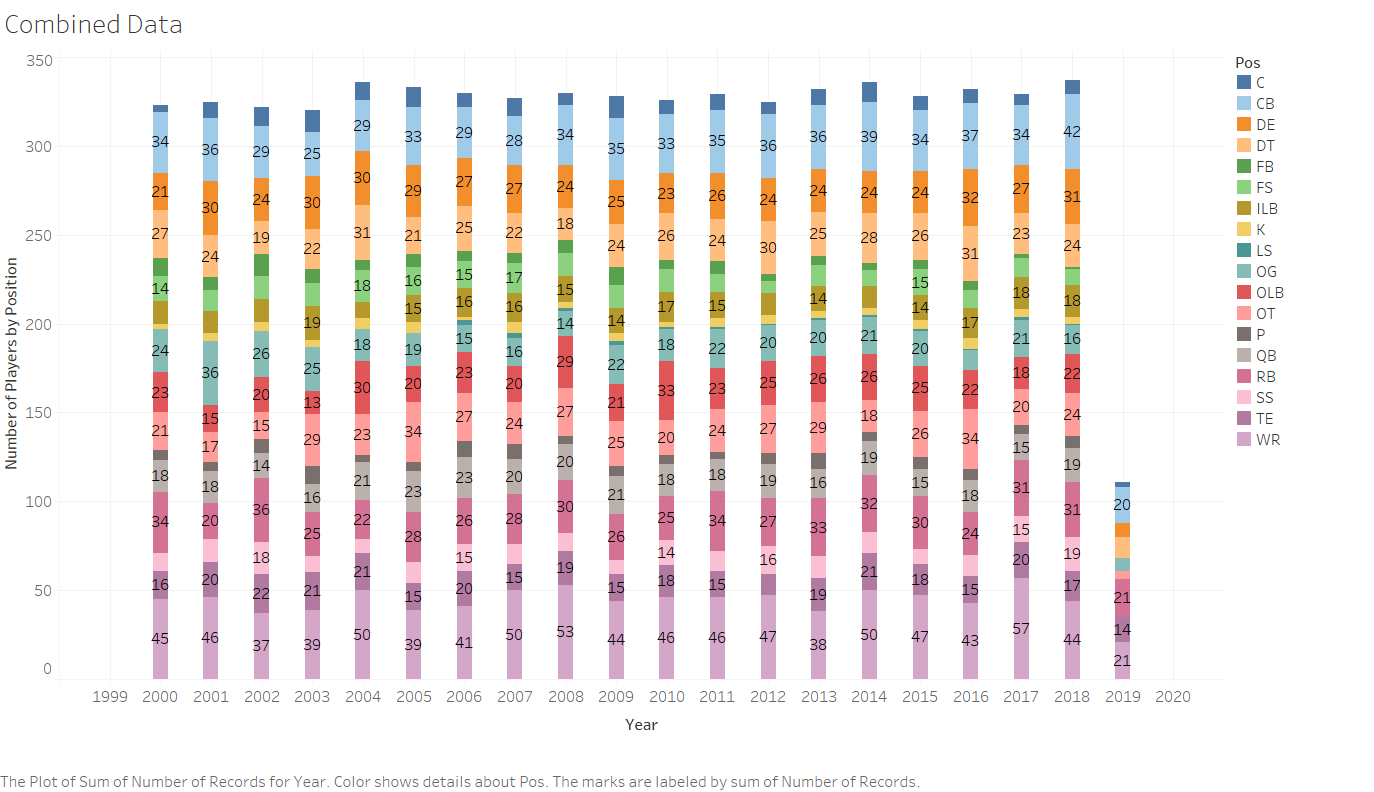

In [95]:
from wand.image import Image as WImage
img = WImage(filename='combine_nfl.png')
img


Original Data set was filtered to get the years from year 2000 and up.

In [96]:
combine.astype({'Year': 'int32'}).dtypes

Rk               float64
Year               int32
Player            object
Pos               object
AV               float64
School            object
College           object
Height_In          int64
Wt                 int64
40YD             float64
Vertical         float64
BenchReps        float64
Broad Jump       float64
3Cone            float64
Shuttle          float64
Pick             float64
Round            float64
Team              object
Drafted            int64
Dataset_n_Seq     object
dtype: object

In [97]:
combine = combine[combine['Year'] > 1999]
combine = combine[combine['40YD'] < 9.99]
combine = combine[combine['3Cone'] < 9.99]
combine = combine[combine['Shuttle'] < 9.99]

In [98]:
combine.head()

,Rk,Year,Player,Pos,AV,School,College,Height_In,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Pick,Round,Team,Drafted,Dataset_n_Seq
1967,81.0,2000,Aaron Fields,DE,0.0,Troy (AL),Other,76,243,4.76,34.0,22.0,115.0,7.51,4.56,NaN,NaN,NaN,0,Ka0089
1969,24.0,2000,Aaron Shea,FB,6.0,Michigan,College Stats,76,253,4.81,37.5,NaN,114.0,6.72,4.30,110.0,4.0,Cleveland Browns,1,Ka0253
1971,130.0,2000,Adam Davis,OG,NaN,Oklahoma State,Other,76,309,5.66,26.0,NaN,92.0,8.51,5.00,NaN,NaN,NaN,0,Ka0070
1976,47.0,2000,Al Lucas,DT,3.0,Troy (AL),Other,73,294,5.00,36.0,28.0,108.0,7.44,4.56,NaN,NaN,NaN,0,Ka0185
1977,156.0,2000,Alton Lusk,WR,NaN,Central Oklahoma,Other,74,182,4.61,36.5,NaN,122.0,7.16,4.26,NaN,NaN,NaN,0,Ka0187


In [99]:
combine = combine.reset_index(drop=True)
combine['Pos'].unique()

array(['DE', 'FB', 'OG', 'DT', 'WR', 'ILB', 'TE', 'CB', 'RB', 'FS', 'QB',
       'OT', 'C', 'OLB', 'SS', 'LS', 'P'], dtype=object)

We created a pairplot for each indicator in the combine data and the two different colors show the difference between drafted and the non-drafted players.


In [100]:
combine_events = combine[["Pos","Height_In","Wt","40YD", "Vertical","BenchReps","Broad Jump","3Cone","Shuttle","Drafted"]].dropna(how='any')
combine_events.head()

,Pos,Height_In,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted
0,DE,76,243,4.76,34.0,22.0,115.0,7.51,4.56,0
3,DT,73,294,5.00,36.0,28.0,108.0,7.44,4.56,0
5,DT,76,289,5.09,27.5,22.0,102.0,7.73,4.61,1
6,ILB,73,235,4.72,34.0,16.0,114.0,7.30,4.24,0
7,OG,74,305,5.43,28.0,26.0,103.0,7.54,4.60,0


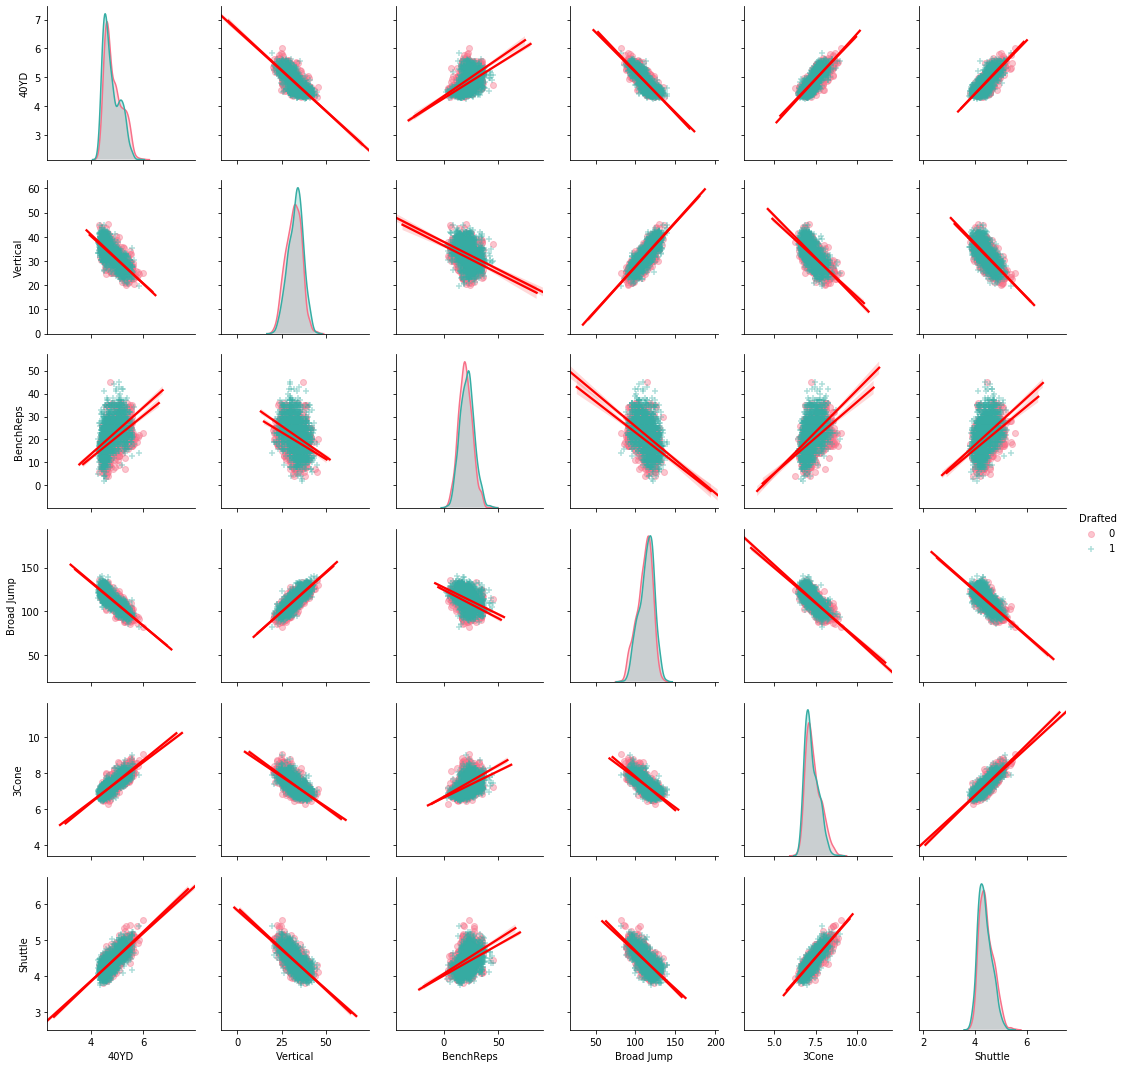

In [136]:
#sns.set(style="ticks", color_codes=True)
sns.pairplot(combine_events,
             vars=["40YD", "Vertical","BenchReps","Broad Jump","3Cone","Shuttle"],
             hue='Drafted', 
             markers=["o","+"],
             palette="husl",
             diag_kind="auto",
             kind="reg",
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}})
#g = g.map_diag(plt.hist)
#g= g.map_offdiag(plt.scatter)

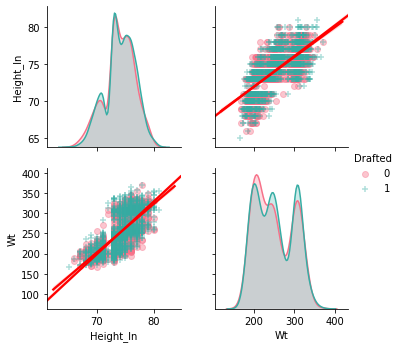

In [147]:
sns.pairplot(combine_events,
             vars=["Height_In","Wt"],
             hue='Drafted', 
             markers=["o","+"],
             palette="husl",
             diag_kind="auto",
             kind="reg",
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}})

/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


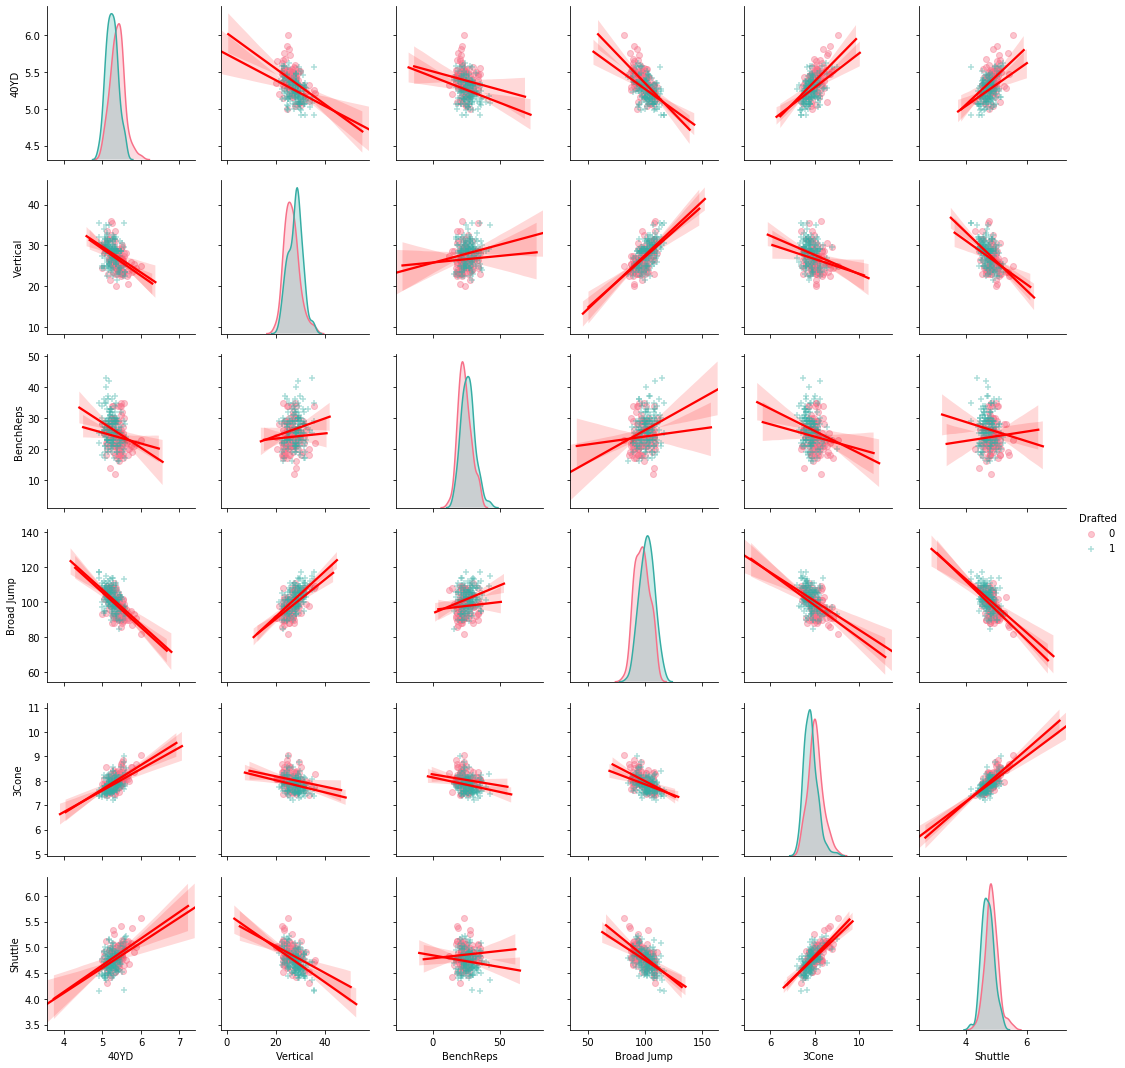

In [139]:

sns.pairplot(combine_events[combine["Pos"]=="OG"],
             vars=["40YD", "Vertical","BenchReps","Broad Jump","3Cone","Shuttle"],
             hue='Drafted', 
             markers=["o","+"],
             palette="husl",
             diag_kind="auto",
             kind="reg",
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}})

/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


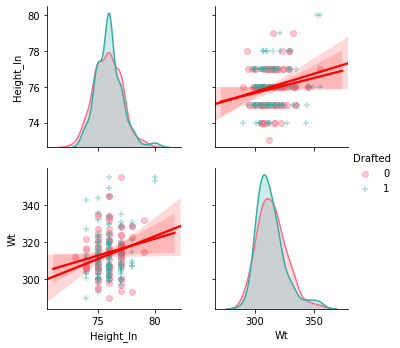

In [205]:
p1 = sns.pairplot(combine_events[combine["Pos"]=="OG"],
             vars=["Height_In","Wt"],
             hue='Drafted', 
             markers=["o","+"],
             palette="husl",
             diag_kind="auto",
             kind="reg",
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}})
p1.savefig("test.png")

# Naive Bayes Classifier - 
first convert the position variable to and integer. 
Create X and y variables for the classifier.

In [154]:
# Assign the data to X and y
# 'DE', 'FB', 'OG', 'DT', 'WR', 'ILB', 'TE', 'CB', 'RB', 'FS', 'QB','OT', 'C', 'OLB', 'SS', 'LS', 'P'
combine_events["nPos"] = np.where(combine_events["Pos"]=="DE",0,
                                  np.where(combine_events["Pos"]=="FB",1,
                                    np.where(combine_events["Pos"]=="OG",2,
                                    np.where(combine_events["Pos"]=="DT",3,
                                    np.where(combine_events["Pos"]=="WR",4,
                                    np.where(combine_events["Pos"]=="ILB",5,
                                    np.where(combine_events["Pos"]=="TE",6,
                                    np.where(combine_events["Pos"]=="CB",7,
                                    np.where(combine_events["Pos"]=="RB",8,
                                    np.where(combine_events["Pos"]=="FS",9,
                                    np.where(combine_events["Pos"]=="QB",10,
                                    np.where(combine_events["Pos"]=="OT",11,
                                    np.where(combine_events["Pos"]=="C",12,
                                    np.where(combine_events["Pos"]=="OLB",13,
                                    np.where(combine_events["Pos"]=="SS",14,
                                    np.where(combine_events["Pos"]=="LS",15,
                                    np.where(combine_events["Pos"]=="P",16,17
                                          )))))))))))))))))

X = combine_events[["nPos","Height_In","Wt","40YD", "Vertical","BenchReps","Broad Jump","3Cone","Shuttle"]]
y = combine_events["Drafted"].values.reshape(-1, 1)
print(X.shape, y.shape)

(2993, 9) (2993, 1)


In [155]:
combine_events.isnull().sum()

Pos           0
Height_In     0
Wt            0
40YD          0
Vertical      0
BenchReps     0
Broad Jump    0
3Cone         0
Shuttle       0
Drafted       0
nPos          0
dtype: int64

## Split the data into test and train groups

In [156]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


## Generate Naive Bayes model

In [157]:
# Create the model using LinearRegression

from sklearn.naive_bayes import BernoulliNB, GaussianNB
GNBmodel = GaussianNB()
BNBmodel = BernoulliNB()

In [158]:
# Fit the model to the training data and calculate the scores for the training and testing data
from sklearn.metrics import confusion_matrix

GNBpredictions = GNBmodel.fit(X_train, y_train).predict(X_train)
BNBpredictions = BNBmodel.fit(X_train, y_train).predict(X_train)


gtn,gfp,gfn,gtp = confusion_matrix(y_train,GNBpredictions).ravel()

btn,bfp,bfn,btp = confusion_matrix(y_train,BNBpredictions).ravel()

print("True Negatives: {} {}".format(gtn,btn))
print("False Positives: {} {}".format(gfp,bfp))
print("False Negatives: {} {}".format(gfn,bfn))
print("True Positives: {} {}".format(gtp,btp))

#Accuracy
gAccuracy = (gtn+gtp)*100/(gtp+gtn+gfp+gfn) 
print("Gaussian Accuracy {:0.2f}%:".format(gAccuracy))
bAccuracy = (btn+btp)*100/(btp+btn+bfp+bfn) 
print("Bernoulli Accuracy {:0.2f}%:".format(bAccuracy))


True Negatives: 208 0
False Positives: 543 751
False Negatives: 287 0
True Positives: 1206 1493
Gaussian Accuracy 63.01%:
Bernoulli Accuracy 66.53%:


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [159]:
GNBpredictions = GNBmodel.predict(X_test)
BNBpredictions = BNBmodel.predict(X_test)

gtn,gfp,gfn,gtp = confusion_matrix(y_test,GNBpredictions).ravel()
btn,bfp,bfn,btp = confusion_matrix(y_test,BNBpredictions).ravel()
print("True Negatives: {} {}".format(gtn,btn))
print("False Positives: {} {}".format(gfp,bfp))
print("False Negatives: {} {}".format(gfn,bfn))
print("True Positives: {} {}".format(gtp,btp))

#Accuracy
gAccuracy = (gtn+gtp)*100/(gtp+gtn+gfp+gfn) 
print("Gaussian Accuracy {:0.2f}%:".format(gAccuracy))
bAccuracy = (btn+btp)*100/(btp+btn+bfp+bfn) 
print("Bernoulli Accuracy {:0.2f}%:".format(bAccuracy))

True Negatives: 71 0
False Positives: 178 249
False Negatives: 103 0
True Positives: 397 500
Gaussian Accuracy 62.48%:
Bernoulli Accuracy 66.76%:


In [131]:
import ipywidgets as widgets

height = widgets.BoundedFloatText(
    value=72.0,
    min=0,
    max=90.0,
    step=0.1,
    description='Height in inches:',
    disabled=False
)

weight = widgets.BoundedFloatText(
    value=225,
    min=0,
    max=400.0,
    step=0.1,
    description='weight in pounds:',
    disabled=False
)

position = widgets.Dropdown(
    options=[('DE',0), ('FB',1), ('OG',2), ('DT',3), ('WR',4), ('ILB',5), ('TE',6), ('CB',7), ('RB',8), ('FS',9), ('QB',10),
       ('OT',11), ('C',12), ('OLB',13), ('SS',14), ('LS',15), ('P',16)],
    value=0,
    description='Position:',
    disabled=False,
)

time40 = widgets.FloatSlider(
    value=5.00,
    min=4.00,
    max=7.00,
    step=0.01,
    description='40 Time:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

timeShuttle = widgets.FloatSlider(
    value=7.00,
    min=4.00,
    max=7.00,
    step=0.01,
    description='Shuttle Time:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

time3Cone = widgets.FloatSlider(
    value=7.00,
    min=4.00,
    max=10.00,
    step=0.01,
    description='3Cone Time:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

distVertical = widgets.FloatSlider(
    value=35.00,
    min=0.00,
    max=70.00,
    step=0.5,
    description='Vertical Leap in inches:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

distBroad = widgets.FloatSlider(
    value=100.0,
    min=0.00,
    max=200.00,
    step=0.5,
    description='Broad Jump in inches:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

bench = widgets.BoundedIntText(
    value=10,
    min=0,
    max=60,
    step=1,
    description='Bench Press Reps:',
    disabled=False
)


display(height)
display(weight)
display(position)
display(time40)
display(timeShuttle)
display(time3Cone)
display(distVertical)
display(distBroad)
display(bench)

button = widgets.Button(description = "Run Model")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        #"nPos","Height_In","Wt","40YD", "Vertical","BenchReps","Broad Jump","3Cone","Shuttle"
        GNBprediction = GNBmodel.predict([[position.value,height.value,weight.value,time40.value,distVertical.value,bench.value,distBroad.value,time3Cone.value,timeShuttle.value]])
        BNBprediction = BNBmodel.predict([[position.value,height.value,weight.value,time40.value,distVertical.value,bench.value,distBroad.value,time3Cone.value,timeShuttle.value]])
        if (GNBprediction == 0):
            print([position.value,height.value,weight.value,time40.value,distVertical.value,bench.value,distBroad.value,time3Cone.value,timeShuttle.value])
            print("Gaussian: Undrafted")
        else:
            print([position.value,height.value,weight.value,time40.value,distVertical.value,bench.value,distBroad.value,time3Cone.value,timeShuttle.value])
            print("Gaussian: Drafted")
        if (BNBprediction == 0):
            print([position.value,height.value,weight.value,time40.value,distVertical.value,bench.value,distBroad.value,time3Cone.value,timeShuttle.value])
            print("Bernoulli: Undrafted")
        else:
            print([position.value,height.value,weight.value,time40.value,distVertical.value,bench.value,distBroad.value,time3Cone.value,timeShuttle.value])
            print("Bernoulli: Drafted")
        
button.on_click(on_button_clicked)

###
###2013	Michael Buchanan	DE	0	Illinois	College Stats	77	255	4.78	33	22	113	6.91	4.44	226	7	New England Patriots	1	Ka4105
###2013	Michael Ford	RB	0	Louisiana State	College Stats	69	210	4.5	38.5	25	130	6.87	4.25				0	Ka4140
###

BoundedFloatText(value=72.0, description='Height in inches:', max=90.0, step=0.1)

BoundedFloatText(value=225.0, description='weight in pounds:', max=400.0, step=0.1)

Dropdown(description='Position:', options=(('DE', 0), ('FB', 1), ('OG', 2), ('DT', 3), ('WR', 4), ('ILB', 5), …

FloatSlider(value=5.0, description='40 Time:', max=7.0, min=4.0, step=0.01)

FloatSlider(value=7.0, description='Shuttle Time:', max=7.0, min=4.0, step=0.01)

FloatSlider(value=7.0, description='3Cone Time:', max=10.0, min=4.0, step=0.01)

FloatSlider(value=35.0, description='Vertical Leap in inches:', max=70.0, readout_format='.1f', step=0.5)

FloatSlider(value=100.0, description='Broad Jump in inches:', max=200.0, readout_format='.1f', step=0.5)

BoundedIntText(value=10, description='Bench Press Reps:', max=60)

Button(description='Run Model', style=ButtonStyle())

Output()

# Cluster analysis to determine player position

#  How well can we make predictions about the type of position a person plays ( based on physical characteristics and combine performance measurements)? 

We'll go broad first and then try to get more specific.
1.  Is this person a lineman or not?
2.  Does this person play defense or offense?
3.  What broad catagory does this person fall into?  Possible values are Back, Linebacker, Lineman, QB or Receiver.
4.  What is the actual position?

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Add category columns to classify the position.

In [111]:
combine2 = pd.read_csv('Combined_D.csv')
category = pd.read_csv('Category.csv')

We need to do 3 things here:
1.  Add the categories to the dataset using a merge.
2.  Drop any rows with null values since the model fit will fail.
3.  See what's left.

In [112]:
combine2 = pd.merge(combine2, category, on='Pos')
combine2 = combine2.dropna(how='any')
combine2['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017])

I'm going to split the results into 2.  2017 and everything else.  I will use everything else to train it and then test it using 2017.

In [113]:
combine2017 = combine2[combine2['Year'] == 2017]
combine2 = combine2[combine2['Year'] < 2017]

## 1.  Is this person a lineman or not?

Assign the data to X and y

In [114]:
X = combine2[["Year","Height_In","Wt","40YD","Vertical","BenchReps","Broad Jump","3Cone","Shuttle","Round"]]
y = combine2["Lineman"]

Split data into training and testing data.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

 Loop through different k values to see which has the highest accuracy
 Note: We only use odd numbers because we don't want any ties

k: 1, Train/Test Score: 1.000/0.975
k: 3, Train/Test Score: 0.992/0.980
k: 5, Train/Test Score: 0.992/0.980
k: 7, Train/Test Score: 0.992/0.982
k: 9, Train/Test Score: 0.992/0.980
k: 11, Train/Test Score: 0.992/0.980
k: 13, Train/Test Score: 0.992/0.980
k: 15, Train/Test Score: 0.992/0.980
k: 17, Train/Test Score: 0.992/0.980
k: 19, Train/Test Score: 0.992/0.980
k: 21, Train/Test Score: 0.991/0.980
k: 23, Train/Test Score: 0.991/0.980
k: 25, Train/Test Score: 0.991/0.980
k: 27, Train/Test Score: 0.990/0.980
k: 29, Train/Test Score: 0.991/0.980


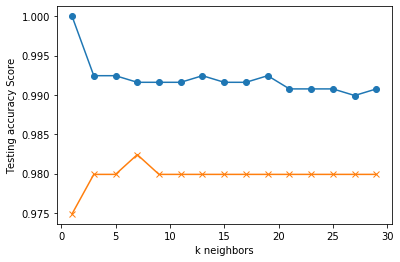

In [116]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Looks like we get our best prediction using nearest neighbors between 7 and 11.  Lets go with 9 and try this out on the 2017 data.

In [117]:
X = combine2017[["Year","Height_In","Wt","40YD","Vertical","BenchReps","Broad Jump","3Cone","Shuttle","Round"]]
y = combine2017["Lineman"]
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X, y)
print('k=8 Test Acc: %.3f' % knn.score(X_test, y_test))

k=8 Test Acc: 0.977


## Conclusion.  We can predict with 97% certainty whether a person is a lineman or not.

# 2.  Does this person play defense or offense?

Assign the data to X and y

In [118]:
X = combine2[["Year","Height_In","Wt","40YD","Vertical","BenchReps","Broad Jump","3Cone","Shuttle","Round"]]
y = combine2["Side"]

Split data into training and testing data.

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

 Loop through different k values to see which has the highest accuracy
 Note: We only use odd numbers because we don't want any ties.

k: 1, Train/Test Score: 1.000/0.636
k: 3, Train/Test Score: 0.830/0.681
k: 5, Train/Test Score: 0.810/0.688
k: 7, Train/Test Score: 0.781/0.683
k: 9, Train/Test Score: 0.766/0.656
k: 11, Train/Test Score: 0.753/0.688
k: 13, Train/Test Score: 0.749/0.683
k: 15, Train/Test Score: 0.737/0.696
k: 17, Train/Test Score: 0.734/0.683
k: 19, Train/Test Score: 0.741/0.686
k: 21, Train/Test Score: 0.741/0.701
k: 23, Train/Test Score: 0.732/0.698
k: 25, Train/Test Score: 0.731/0.686
k: 27, Train/Test Score: 0.733/0.691
k: 29, Train/Test Score: 0.729/0.686
k: 31, Train/Test Score: 0.731/0.681
k: 33, Train/Test Score: 0.731/0.681
k: 35, Train/Test Score: 0.731/0.686
k: 37, Train/Test Score: 0.730/0.681
k: 39, Train/Test Score: 0.730/0.683
k: 41, Train/Test Score: 0.729/0.681
k: 43, Train/Test Score: 0.728/0.683
k: 45, Train/Test Score: 0.730/0.673
k: 47, Train/Test Score: 0.730/0.673
k: 49, Train/Test Score: 0.736/0.676


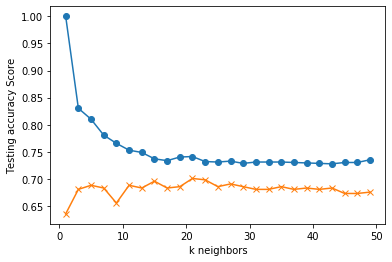

In [120]:
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Looks like we get our best prediction using nearest neighbors between 19 and 23.  Lets go with 22 and try this out on the 2017 data.

In [121]:
X = combine2017[["Year","Height_In","Wt","40YD","Vertical","BenchReps","Broad Jump","3Cone","Shuttle","Round"]]
y = combine2017["Side"]

knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X, y)
print('k=8 Test Acc: %.3f' % knn.score(X_test, y_test))

k=8 Test Acc: 0.606


## Conclusion.  I don't think we can predict if someone plays offense or defense.

# 3.  What broad catagory does this person fall into?  Possible values are Back, Linebacker, Lineman, QB or Receiver.

Assign the data to X and y

In [122]:
X = combine2[["Year","Height_In","Wt","40YD","Vertical","BenchReps","Broad Jump","3Cone","Shuttle","Round"]]
y = combine2["Category"]

Split data into training and testing data.

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

 Loop through different k values to see which has the highest accuracy
 Note: We only use odd numbers because we don't want any ties.

k: 1, Train/Test Score: 1.000/0.678
k: 3, Train/Test Score: 0.823/0.681
k: 5, Train/Test Score: 0.793/0.701
k: 7, Train/Test Score: 0.779/0.688
k: 9, Train/Test Score: 0.764/0.698
k: 11, Train/Test Score: 0.758/0.698
k: 13, Train/Test Score: 0.751/0.714
k: 15, Train/Test Score: 0.746/0.719
k: 17, Train/Test Score: 0.751/0.719
k: 19, Train/Test Score: 0.746/0.714
k: 21, Train/Test Score: 0.746/0.711
k: 23, Train/Test Score: 0.738/0.706
k: 25, Train/Test Score: 0.739/0.706
k: 27, Train/Test Score: 0.736/0.709
k: 29, Train/Test Score: 0.736/0.716
k: 31, Train/Test Score: 0.736/0.721
k: 33, Train/Test Score: 0.734/0.716
k: 35, Train/Test Score: 0.735/0.714
k: 37, Train/Test Score: 0.736/0.716
k: 39, Train/Test Score: 0.732/0.716
k: 41, Train/Test Score: 0.733/0.714
k: 43, Train/Test Score: 0.732/0.716
k: 45, Train/Test Score: 0.733/0.714
k: 47, Train/Test Score: 0.732/0.716
k: 49, Train/Test Score: 0.730/0.716


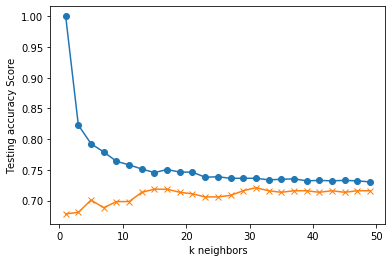

In [124]:
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Looks like we get our best prediction using nearest neighbors of 27.  Lets go with 27 and try it on our 2017 data.

In [125]:
X = combine2017[["Year","Height_In","Wt","40YD","Vertical","BenchReps","Broad Jump","3Cone","Shuttle","Round"]]
y = combine2017["Category"]

knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X, y)
print('k=8 Test Acc: %.3f' % knn.score(X_test, y_test))

k=8 Test Acc: 0.701


## Conclusion.  We can reasonably predict with about 70% certainty the broad category of a position.

# 4.  What is the actual position?

Assign the data to X and y

In [126]:
X = combine2[["Year","Height_In","Wt","40YD","Vertical","BenchReps","Broad Jump","3Cone","Shuttle","Round"]]
y = combine2["Pos"]

Split data into training and testing data

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

Loop through different k values to see which has the highest accuracy Note: We only use odd numbers because we don't want any ties.

k: 1, Train/Test Score: 1.000/0.425
k: 3, Train/Test Score: 0.689/0.440
k: 5, Train/Test Score: 0.657/0.457
k: 7, Train/Test Score: 0.639/0.452
k: 9, Train/Test Score: 0.607/0.477
k: 11, Train/Test Score: 0.597/0.452
k: 13, Train/Test Score: 0.589/0.490
k: 15, Train/Test Score: 0.596/0.477
k: 17, Train/Test Score: 0.587/0.492
k: 19, Train/Test Score: 0.585/0.495
k: 21, Train/Test Score: 0.577/0.497
k: 23, Train/Test Score: 0.573/0.495
k: 25, Train/Test Score: 0.568/0.508
k: 27, Train/Test Score: 0.559/0.487
k: 29, Train/Test Score: 0.552/0.485
k: 31, Train/Test Score: 0.550/0.500
k: 33, Train/Test Score: 0.551/0.497
k: 35, Train/Test Score: 0.552/0.500
k: 37, Train/Test Score: 0.552/0.487
k: 39, Train/Test Score: 0.553/0.485
k: 41, Train/Test Score: 0.558/0.500
k: 43, Train/Test Score: 0.553/0.490
k: 45, Train/Test Score: 0.548/0.487
k: 47, Train/Test Score: 0.547/0.482
k: 49, Train/Test Score: 0.546/0.485


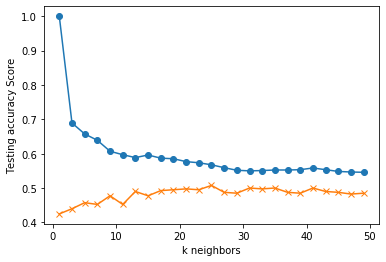

In [128]:
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Looks like we get our best prediction using nearest neighbors of 22. Lets go with 22 and try it out on our 2017 data.

In [129]:
X = combine2017[["Year","Height_In","Wt","40YD","Vertical","BenchReps","Broad Jump","3Cone","Shuttle","Round"]]
y = combine2017["Pos"]

knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)
print('k=8 Test Acc: %.3f' % knn.score(X_test, y_test))

k=8 Test Acc: 0.487


## Conclusion.  Its not feasible to predict the exact position of a person.